# Project: Clean and analyze social media usage data with Python
Coursera Project Network

Link to Coursera's outline of the task: [https://www.coursera.org/projects/analyze-social-media-python?](https://www.coursera.org/projects/analyze-social-media-python?)

Link to my finished project in Coursera: [https://www.coursera.org/user/321bfd59872d660b67247900c23b0421](https://www.coursera.org/user/321bfd59872d660b67247900c23b0421)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#### Generate random data

In [34]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

n = 500
dates = pd.date_range('2021-01-01', periods=n) # create 500 consecutive dates starting from 2021-01-01
# print(dates)= DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', ...])

random_categories = [random.choice(categories) for _ in range(n)] # assign a random category to each entry (create a list of 500 categories)
# print(random_categories) = ['Fashion', 'Culture', 'Travel', 'Fashion', 'Health', ...]

likes = np.random.randint(0, 10000, size=n) # generate a list of 500 integers that represent the likes of the posts
# print(likes) = [ 859 5964 6958 5647 3949 7841  483 6165  339 1525 ... ]

# combine it all into a dictionary
data = {
    'Date': dates,
    'Category': random_categories,
    'Likes': likes
}

# turn the dictionary into a data frame
df = pd.DataFrame(data)

#### Explore data

In [35]:
df.head()

,Date,Category,Likes
0,2021-01-01,Family,1087
1,2021-01-02,Culture,3994
2,2021-01-03,Health,1352
3,2021-01-04,Family,1196
4,2021-01-05,Health,8462


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [37]:
df.describe()

,Date,Likes
count,500,500.000000
mean,2021-09-07 12:00:00,4961.658000
min,2021-01-01 00:00:00,0.000000
25%,2021-05-05 18:00:00,2532.000000
50%,2021-09-07 12:00:00,4707.500000
75%,2022-01-10 06:00:00,7503.000000
max,2022-05-15 00:00:00,9982.000000
std,NaN,2842.589053


In [38]:
df['Category'].value_counts() # print the count (the number of times it appears) of each value in the 'Category' column

Category
Health     87
Family     74
Fitness    59
Culture    58
Music      58
Food       55
Travel     55
Fashion    54
Name: count, dtype: int64

#### Clean data

In [39]:
df = df.dropna() # delete rows with null values (though there are none)
df = df.drop_duplicates() # delete duplicated rows (rows that have the same values in every column)

df = df.reset_index(drop=True) # reset index after deleting rows

print("New amount of rows: " + str(len(df))) # though it may still be the same

New amount of rows: 500


#### Analyze and visualize data

##### Plots

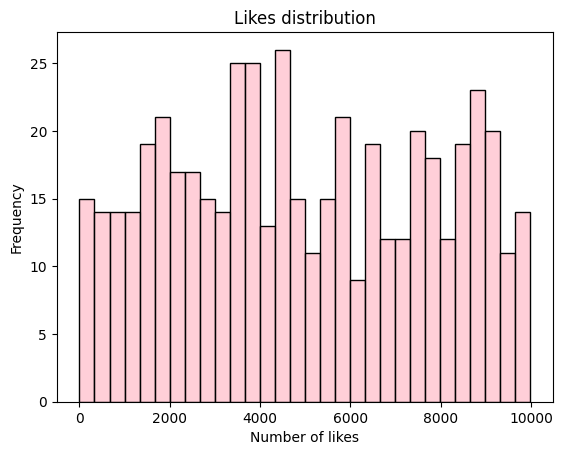

In [40]:
sns.histplot(data=df, x=df['Likes'], bins=30, color='pink') # create an histogram to visualize likes (same as x='Likes')
plt.title('Likes distribution')
plt.xlabel('Number of likes')
plt.ylabel('Frequency')
plt.show()

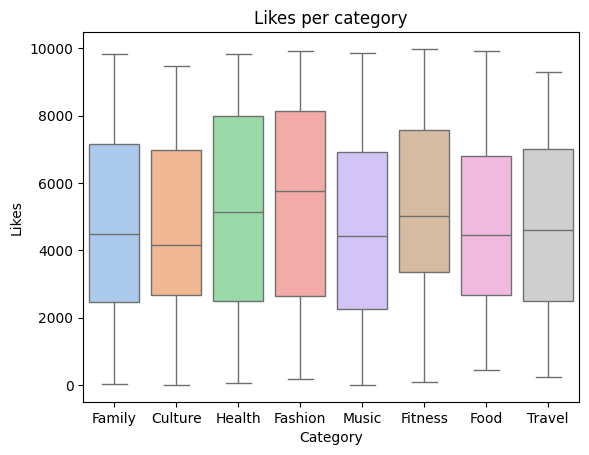

In [41]:
sns.boxplot(data=df, x=df['Category'], y=df['Likes'], hue='Category', palette='pastel', legend=False) # create a box plot about likes per category
plt.title('Likes per category')
plt.show()

##### Statistics

In [42]:
df['Likes'].mean()

4961.658

In [52]:
category_likes_mean = df.groupby('Category')['Likes'].mean() # I group every entry by category and then print the mean of likes in that category
category_likes_mean

Category
Culture    4647.896552
Family     4864.081081
Fashion    5426.388889
Fitness    5200.593220
Food       4897.709091
Health     5210.022989
Music      4598.879310
Travel     4764.872727
Name: Likes, dtype: float64

In [50]:
print(category_likes_mean.idxmax()) # the category with the highest mean of likes
print(category_likes_mean.max()) # the highest mean of likes

Fashion
5426.388888888889


In [53]:
print(category_likes_mean.idxmin()) # the category with the highest mean of likes
print(category_likes_mean.min()) # the highest mean of likes

Music
4598.879310344828


#### Conclusions
The mean amount of likes during the period is `4962` in the last random-generated data. The most popular category is `Fashion` with approximately `5426` likes and the least popular category is `Music` with `4599` likes. However, all categories have similar popularity. 